In [1]:
from math import *

"""
Define the counting experiment here:
"""
# low statistic
nSig = 1.0
nBkg = 1.2
mu = 9.0

In [2]:
def expoDivideFrac(n, s, b, mu):
    """
    calculate (mu * s + b) ^ n / n!
    """
    val = 0
    for i in range(n+1):
        if i == 0:
            val = 1
        else:
            val = (mu * s + b) * val / i

    return val

def Pois(n, s, b, mu):
    """
    Poisson distribution
    """
    return expoDivideFrac(n, s, b, mu) * exp(-1 * (mu * s + b))

def qmu(n, s, b, mu):
    """
    one side (P)LR test statistic
    """
    muHat = (n - b) / s
    if muHat <= mu:
        if muHat < 0:
            return -2 * log(Pois(n, s, b, mu) / Pois(n, s, b, 0))
        else:
            return -2 * log(Pois(n, s, b, mu) / Pois(n, s, b, muHat))
    return 0

def makeDist(dist, fqm):
    """
    helper function to make the distribution according to $1
    """
    myDist = []
    first = True
    for i in range(len(fqm)):
        if fqm[i] > 0 or first:
            myDist.append(dist[i])
            if fqm[i] == 0:
                first = False
        else:
            myDist[-1] += dist[i]
    
    return myDist


In [3]:
# peek the values
print("B-only Poisson distribution: ", ["{:.3f}".format(float(Pois(i, nSig, nBkg, 0))) for i in range(10)])
print("S+B    Poisson distribution: ", ["{:.3f}".format(float(Pois(i, nSig, nBkg, mu))) for i in range(10)])
print("PLR at different N(obs).   : ", ["{:.3f}".format(float(qmu(i, nSig, nBkg, mu))) for i in range(10)])
"""
get the distributions of B-Only and S+B test statistics
NOTE: use large n (1000) to approximate sum to infinite
"""
fQmu = [qmu(i, nSig, nBkg, mu) for i in range(1000)]
hypoBOnly = makeDist([Pois(i, nSig, nBkg, 0) for i in range(1000)], fQmu)
hypoSPlusB = makeDist([Pois(i, nSig, nBkg, mu) for i in range(1000)], fQmu)

B-only Poisson distribution:  ['0.301', '0.361', '0.217', '0.087', '0.026', '0.006', '0.001', '0.000', '0.000', '0.000']
S+B    Poisson distribution:  ['0.000', '0.000', '0.002', '0.007', '0.017', '0.034', '0.058', '0.085', '0.108', '0.122']
PLR at different N(obs).   :  ['18.000', '13.720', '9.883', '7.057', '4.911', '3.271', '2.032', '1.129', '0.513', '0.147']


In [4]:
from matplotlib import pyplot as plt 
import numpy as np  

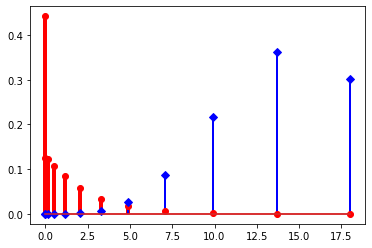

In [5]:
"""
make a simple stem plot
"""
assert(len(hypoSPlusB) == len(hypoSPlusB))
x = np.array(fQmu[:len(hypoSPlusB)])
ySPlusB = np.array(hypoSPlusB)
yBOnly = np.array(hypoBOnly)
markerline, stemlines, baseline = plt.stem(x, ySPlusB, use_line_collection=True, linefmt='red', markerfmt='o')
markerline.set_markerfacecolor('red')
markerline.set_markeredgecolor('red')
stemlines.set_linewidth(4)
markerline, stemlines, baseline = plt.stem(x, yBOnly, use_line_collection=True, linefmt='blue', markerfmt='D')
markerline.set_markerfacecolor('blue')
markerline.set_markeredgecolor('blue')
stemlines.set_linewidth(2)
#plt.yscale('log')  # setLogy
plt.show()